## Linguipedia Codefest - Natural Language Processing

### Problem Statement

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

#### Evaluation Metric
The metric used for evaluating the performance of classification model would be **weighted F1-Score**.


### Table contents :

1. Understanding the problem statement
2. 


### 1. Understanding the Problem statement

   The objective of this task is to detect the negative comments from the customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc So, the task is to classify negative sentiment tweets from other tweets towards other companies.

  Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is negative and label ‘0’ denotes the tweet is not negative, the objective is to predict the labels on the given test dataset.

### 2. Text Preprocessing and Cleaning

#### Importing the required packages

In [3]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

#### Loading the datasets

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

###### Checking the first few rows of the dataset

In [5]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


* The data has 3 columns id, label, and tweet. label is the binary target variable and tweet contains the tweets that have to be cleaned and preprocessed.

#### Combining the train and test for sake of convenience

In [6]:
combined = train.append(test, ignore_index=True)
combined.tail()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,id,label,tweet
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...
9872,9873,NaN,Finally I got it .. thanx my father .. #Samsun...


In [7]:
combined['label'].dtype

dtype('float64')

### 2A. Removing Twitter handle (@user)

@username - Remove "@username" via regex matching or replace it with generic word 'username'.


#### Defining function for that :

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [9]:
combined['tidy_tweet'] = np.vectorize(remove_pattern)(combined['tweet'], "@")
combined.head(15)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
5,6,1.0,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,Happy for us .. #instapic #instadaily #us #son...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http://www.ebay.c...
8,9,0.0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,Photo: #fun #selfie #pool #water #sony #camera...


### 2B. Removing Punctutations,Special characters and Numbers

1. **Lower Case** - Convert the tweets to lower case.
2. **URLs** - Eliminate all of these URLs via regular expression matching or replace with generic word URL.
3. **#hashtag** - replace hashtags with the exact same word without the hash (hash tags may provide some useful information), e.g. #boycottUnitedAirlines replaced with ' boycottUnitedAirlines '.
4. **Punctuations and additional white spaces** - remove punctuation at the start and ending of the tweets, e.g: ' the day is beautiful! ' replaced with 'the day is beautiful'. We also replace multiple whitespaces with a single whitespace

In [10]:
def processTweet2(tweet):
    # process the tweets

   
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet  

In [11]:
combined['tidy_tweet'] = np.vectorize(processTweet2)(combined['tweet'])

combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test URL android apps be...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? talk makememories ...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [12]:
## Removing special characters

combined['tidy_tweet'] = combined['tidy_tweet'].str.replace("[^a-zA-Z]", " ")
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test URL android apps be...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememories ...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


### 2C.Stop Word Removal

Removing the words which have length less than 3

In [13]:
combined['tidy_tweet'] = combined['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test android apps beauti...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would talk makememories unplug relax...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that iphone cute davent...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


### 2D.Tokenization

In [14]:
combined['tidy_tweet']= combined['tidy_tweet'].apply(lambda x: x.split())
combined['tidy_tweet'].head()

0    [fingerprint, Pregnancy, Test, android, apps, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, talk, makememories, unplug...
3    [wired, know, George, made, that, iphone, cute...
4    [What, amazing, service, Apple, even, talk, ab...
Name: tidy_tweet, dtype: object

In [15]:
stop=nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stop]
    return text

combined['tidy_tweet']=combined['tidy_tweet'].apply(lambda x: remove_stopwords(x))

combined['tidy_tweet'].head()

0    [fingerprint, Pregnancy, Test, android, apps, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, Would, talk, makememories, unplug, rela...
3    [wired, know, George, made, iphone, cute, dave...
4    [What, amazing, service, Apple, even, talk, qu...
Name: tidy_tweet, dtype: object

### 2E. Lemmatizing

I prefer Lemmatizing over Stemming as it checks for the 'context' before removing the suffixes unlike Stemming.

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

combined['tidy_tweet']=combined['tidy_tweet'].apply(lambda x:lemmatizing(x))
combined['tidy_tweet'].head()


0    [fingerprint, Pregnancy, Test, android, apps, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, Would, talk, makememories, unplug, rela...
3    [wired, know, George, made, iphone, cute, dave...
4    [What, amazing, service, Apple, even, talk, qu...
Name: tidy_tweet, dtype: object

In [20]:
### Checking the dataset

combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, Pregnancy, Test, android, apps, ..."
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, transparant, silicon, case, Thanks, ..."
2,3,0.0,We love this! Would you go? #talk #makememorie...,"[love, Would, talk, makememories, unplug, rela..."
3,4,0.0,I'm wired I know I'm George I was made that wa...,"[wired, know, George, made, iphone, cute, dave..."
4,5,1.0,What amazing service! Apple won't even talk to...,"[What, amazing, service, Apple, even, talk, qu..."


#### Removing Redundant words

In [22]:
def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector
 
###load airline sentiment training data 
    
airlinetrain = pd.read_csv("Airline-Sentiment-2-w-AA.csv", encoding ="ISO-8859-1")
tweets = []
featureList = []
for i in range(len(airlinetrain)):
    sentiment = airlinetrain['airline_sentiment'][i]
    tweet = airlinetrain['text'][i]
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))
        
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

### Remove featureList duplicates
featureList = list(set(featureList))
    

FileNotFoundError: File b'Airline-Sentiment-2-w-AA.csv' does not exist

### 3. Story Generation and Visualization from Tweets

**Answering the below questions through visualization:**

* What are the most common words in the entire dataset?
* What are the most common words in the dataset for negative and positive tweets, respectively?
* How many hashtags are there in a tweet?
* Which trends are associated with my dataset?
* Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### 3A Understanding the common words used in the tweets: WordCloud

A **wordcloud** is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [23]:
wc=combined['tidy_tweet'].astype(str)

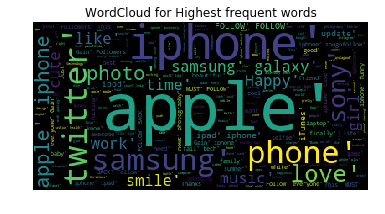

In [24]:
wordcloud2 = WordCloud().generate(' '.join(wc))
#wordcloud=WordCloud.generate_from_frequencies
plt.title('WordCloud for Highest frequent words')
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### 3B Words in non-negative comments

In [186]:
wc2=combined['tidy_tweet'][combined['label']==0].astype(str)

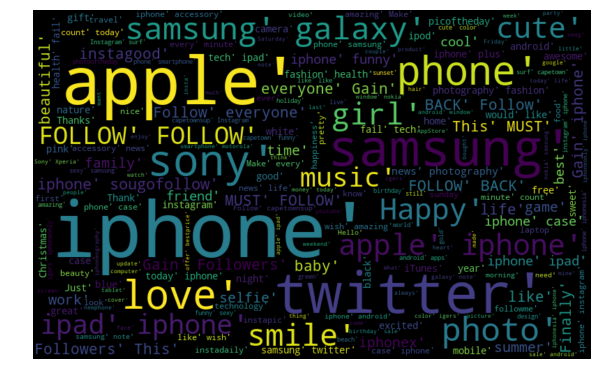

In [187]:
normal_words =' '.join(text for text in wc2)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3C Words in negative comments

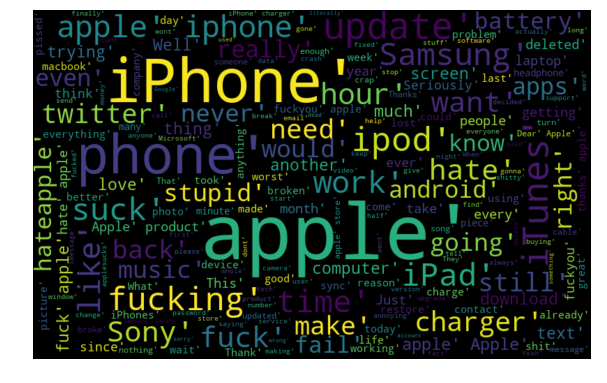

In [188]:
wc3=combined['tidy_tweet'][combined['label']==1].astype(str)

negative_words = ' '.join(text for text in wc3)
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [189]:
## Calculating the length of text 

combined['tidy_length'] = combined['tidy_tweet'].apply(len)
combined.head()

,id,label,tweet,tidy_tweet,tidy_length
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, Pregnancy, Test, android, apps, ...",12
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, transparant, silicon, case, Thanks, ...",9
2,3,0.0,We love this! Would you go? #talk #makememorie...,"[love, Would, talk, makememories, unplug, rela...",10
3,4,0.0,I'm wired I know I'm George I was made that wa...,"[wired, know, George, made, iphone, cute, dave...",8
4,5,1.0,What amazing service! Apple won't even talk to...,"[What, amazing, service, Apple, even, talk, qu...",10


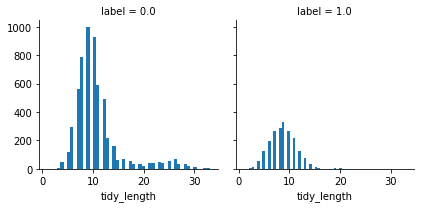

In [190]:
g = sns.FacetGrid(data=combined, col='label')
g.map(plt.hist, 'tidy_length', bins=50)

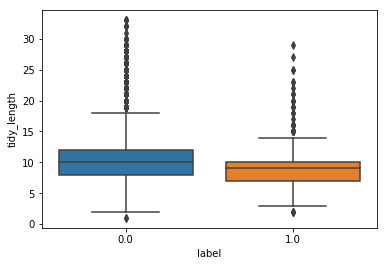

In [191]:
sns.boxplot(x='label', y='tidy_length', data=combined)

### 4. Extracting Features from Cleaned Tweets

In [192]:
combined['tidy_tweet']=combined['tidy_tweet'].astype(str)
type(combined['tidy_tweet'])

pandas.core.series.Series

#### TF-IDF

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combined['tidy_tweet'])

#### Bag Of Words (BOW)

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combined['tidy_tweet'])

### 5. Model Building : Sentiment Analysis

* Algorithms that can be applied:

     * Logistic Regression
     * RandomForest
     * Support Vector Machine
     * XGBoost
     * Naive Bayes
     * Neural Networks
     
     

### Logistic Regression

#### Building model using Bag Of Words using Logistic regression

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.7830985915492957

* Using the Bag Of Words-Logistic Regression model to predict the test set

In [196]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

#### Building model using TF-IDF using Logistic regression

In [197]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.7974230493915534

In [198]:
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

### Random Forest


#### Building model using RANDOM FOREST -Bag of words

In [199]:
from sklearn.ensemble import RandomForestRegressor

train_bow_random = bow[:7920,:]
test_bow_random = bow[7920:,:]

# splitting data into training and validation set
xtrain_bow_random, xvalid_bow_random, ytrain_random, yvalid_random = train_test_split(train_bow_random, train['label'], random_state=42, test_size=0.3)

rf = RandomForestRegressor(n_estimators=10,random_state=42)
rf.fit(xtrain_bow_random, ytrain_random) # training the model

prediction = rf.predict(xvalid_bow_random) # predicting on the validation set
#prediction_int = prediction[:,1]>0.4  # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction.astype(np.int)

f1_score(yvalid_random, prediction_int) # calculating f1 score

0.4591265397536394

* The F1-score of the above model is less when compared to Logistic regression,not considering it for predictions 

#### Building model using RANDOM FOREST --TF-IDF

In [200]:
train_tfidf_random = tfidf[:7920,:]
test_tfidf_random = tfidf[7920:,:]

xtrain_tfidf_random = train_tfidf_random[ytrain_random.index]
xvalid_tfidf_random = train_tfidf_random[yvalid_random.index]

rf.fit(xtrain_tfidf_random, ytrain_random)

prediction = rf.predict(xvalid_tfidf_random)
prediction_int = prediction.astype(np.int)

f1_score(yvalid_random, prediction_int)

0.31939163498098855

### Multinomial Naive Bayes

In [209]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain_bow,ytrain)
# Validating the model
preds = nb.predict(xvalid_bow)
# evaluating the model 

prediction_int = preds.astype(np.int)

print(f1_score(yvalid,prediction_int))
print(classification_report(yvalid,prediction_int))

0.7761413843888071
             precision    recall  f1-score   support

          0       0.93      0.89      0.91      1735
          1       0.74      0.82      0.78       641

avg / total       0.88      0.87      0.87      2376



In [210]:
test_preds= nb.predict(test_bow)
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_NB_bow.csv', index=False) # writing data to a CSV file

In [203]:
## using tfidf
nb.fit(xtrain_tfidf,ytrain)
pred = nb.predict(xvalid_tfidf)
print(f1_score(yvalid,pred))
print(classification_report(yvalid,pred))

0.5128205128205129
             precision    recall  f1-score   support

          0       0.81      0.99      0.89      1735
          1       0.90      0.36      0.51       641

avg / total       0.83      0.82      0.79      2376



### Support Vector Machines

In [204]:
from sklearn.linear_model import SGDClassifier

clf_SVM = SGDClassifier()
clf_SVM.fit(xtrain_bow, ytrain)

preds_SVM = clf_SVM.predict(xvalid_bow) # predicting on the validation set
#prediction_int = prediction[:,1]>0.4  # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int_SVM = preds_SVM.astype(np.int)

print(f1_score(yvalid, prediction_int_SVM)) # calculating f1 score


0.7012145748987854


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [211]:
clf_SVM.fit(xtrain_tfidf, ytrain)

preds_SVM_tfidf = clf_SVM.predict(xvalid_tfidf) # predicting on the validation set
#prediction_int = prediction[:,1]>0.4  # if prediction is greater than or equal to 0.3 than 1 else 0


print(f1_score(yvalid, preds_SVM_tfidf)) # calculating f1 score

print(classification_report(yvalid,preds_SVM_tfidf))


0.7508143322475571
             precision    recall  f1-score   support

          0       0.90      0.93      0.91      1735
          1       0.79      0.72      0.75       641

avg / total       0.87      0.87      0.87      2376



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [212]:
test_pred = clf_SVM_tfidf.predict(test_tfidf_SVM)
test_pred_int = test_pred.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_SVM_tfidf.csv', index=False) # writing data to a CSV file

### XGBoost

In [213]:
from xgboost import XGBClassifier

clf_xgb=XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
clf_xgb.fit(xtrain_bow, ytrain)

preds_xgb = clf_xgb.predict(xvalid_bow) # predicting on the validation set
#prediction_int = prediction[:,1]>0.4  # if prediction is greater than or equal to 0.3 than 1 else 0

print(f1_score(yvalid, preds_xgb)) # calculating f1 score

print(classification_report(yvalid,preds_xgb))

0.7469084913437758
             precision    recall  f1-score   support

          0       0.90      0.93      0.91      1735
          1       0.79      0.71      0.75       641

avg / total       0.87      0.87      0.87      2376



In [214]:
test_pred = clf_xgb.predict(test_bow)
test_pred_int = test_pred.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False) # writing data to a CSV file

In [208]:
clf_xgb.fit(xtrain_tfidf, ytrain)

preds_xgb_tfidf = clf_xgb.predict(xvalid_tfidf)

print(f1_score(yvalid, preds_xgb_tfidf)) # calculating f1 score


0.7389491242702251


### Using Cross Validation score for Logistic Regression

In [235]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(lreg, xtrain_bow, ytrain, cv=10)
metrics.f1_score(ytrain, predicted) 

from sklearn.cross_validation import cross_val_score
f1_score = cross_val_score(lreg, xtrain_bow, ytrain, cv=10,scoring='f1')
print (f1_score)
print (cross_val_score(lreg, xtrain_bow, ytrain, cv=10,scoring='f1'))

[0.76923077 0.70229008 0.71062271 0.7518797  0.78985507 0.72373541
 0.68864469 0.73092369 0.71713147 0.71653543]
[0.76923077 0.70229008 0.71062271 0.7518797  0.78985507 0.72373541
 0.68864469 0.73092369 0.71713147 0.71653543]


In [237]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(lreg, xtrain_tfidf, ytrain, cv=10)
metrics.f1_score(ytrain, predicted) 

from sklearn.cross_validation import cross_val_score
f1_score = cross_val_score(lreg, xtrain_tfidf, ytrain, cv=10,scoring='f1')
print (f1_score)
#print (cross_val_score(lreg, xtrain_bow, ytrain, cv=10,scoring='f1'))

[0.64317181 0.58558559 0.6036036  0.68085106 0.63436123 0.63063063
 0.6212766  0.65198238 0.61818182 0.66968326]
